# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

### Exercise 04.1

The Molecular Dynamics / Monte Carlo (MD_MC) code we have provided compute the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, and the temperature, $T$.

<span style="color:red">Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: block averages, progressive average values and progresssive uncertainties.</span>

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

### Exercise 04.2

By means of your upgraded code, <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. | solid phase  | $\rho^\star = 1.1$  | $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$) |
2. | liquid phase | $\rho^\star = 0.8$  | $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$) |
3. | gas phase    | $\rho^\star = 0.05$ | $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$) |

and show in pictures the obtained progressive average values and uncertainties as a functions of the increasing number of blocks for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$, in reduced units!

# Equilibration Steps

This code is already upgraded for exercise 7 with tail corrections.
After the simulation the final configuration is saved, by this we keep an already equilibrated configuration with its velocity, so that we can restart simulation and measure the properties.

## Results:
- solidi's starting Temperature is 1.55
- liquidi's starting Temperature is 1.977 
- gas's starting Temperature is 0.979

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from seaborn import set_style
from pathlib import Path
import eser_4.equilibration as eq
from typing import List, Any
from matplotlib.figure import Figure

set_style("whitegrid")

In [23]:
eq.compile_program()

make: Entering directory '/home/pilo/simNumeric/NSL_SIMULATOR/SOURCE'

make: Nothing to be done for 'all'.

make: Leaving directory '/home/pilo/simNumeric/NSL_SIMULATOR/SOURCE'

Program compiled


## Solid Phase Simulation


In [24]:
eq.load_config(eq.Phase.SOLID)
eq.run_program('NSL_SIMULATOR/SOURCE/')
eq.save_result(eq.Phase.SOLID)


Actually working on phase : SOLID
Configuration for phase solid loaded
Properties loaded
/home/pilo/simNumeric/NSL_SIMULATOR/SOURCE
Random number generator initialized

Starting Parsing of input.dat

Ended Parsing Properties

System initialized

Properties initialized

ENDING

Program executed
Copying kinetic_energy.dat to eser_4/equilibration_result/solid/kinetic_energy.dat
Copying output.dat to eser_4/equilibration_result/solid/output.dat
Copying potential_energy.dat to eser_4/equilibration_result/solid/potential_energy.dat
Copying pressure.dat to eser_4/equilibration_result/solid/pressure.dat
Copying seed.out to eser_4/equilibration_result/solid/seed.out
Copying temperature.dat to eser_4/equilibration_result/solid/temperature.dat
Copying total_energy.dat to eser_4/equilibration_result/solid/total_energy.dat
Results for phase solid saved


In [30]:
solid_res_dir = Path("eser_4/equilibration_result/solid/")
liquid_res_dir = Path("eser_4/equilibration_result/liquid/")
gas_res_dir = Path("eser_4/equilibration_result/gas/")

In [26]:
def load_resulting_data(data_dir: Path) -> List[pd.DataFrame]:
    common_configs = {
        "header": None,
        "sep": "\s+",
        "skipinitialspace": True,
        "keep_default_na": False,
        "skiprows": 1,
    }
    temperature = pd.read_csv(
        data_dir / "temperature.dat", names=["block", "actual_t", "t_ave", "error"], **common_configs
    )
    kinetic_energy = pd.read_csv(
        data_dir / "kinetic_energy.dat", names=["block", "actual_ke", "ke_ave", "error"], **common_configs
    )
    potential_energy = pd.read_csv(
        data_dir / "potential_energy.dat", names=["block", "actual_pe", "pe_ave", "error"], **common_configs
    )
    total_energy = pd.read_csv(
        data_dir / "total_energy.dat", names=["block", "actual_te", "te_ave", "error"], **common_configs
    )
    pressure = pd.read_csv(
        data_dir / "pressure.dat", names=["block", "actual_p", "p_ave", "error"], **common_configs
    )

    return temperature, kinetic_energy, potential_energy, total_energy, pressure

def print_resulting_data(*dataframes) -> list[Figure, Any]:
    name_conversion={
        "actual_t" : "Temperature [K]",
        "actual_ke" : "Kinetic Energy [J]",
        "actual_pe" : "Potential Energy [J]",
        "actual_te" : "Total Energy [J]",
        "actual_p" : "Pressure [Pa]",
    }

    fig, axs = plt.subplots(1, len(dataframes), figsize=(15, 5), sharex=True, layout="constrained")

    for ax, df in zip(axs, dataframes):
        ax.errorbar(df.iloc[:, 0], df.iloc[:, 1], yerr=df.iloc[:, 3], fmt="o", label="Average")
        ax.plot(df.iloc[:, 0], df.iloc[:, 2], label="Average")
        ax.set_xlabel("Block")
        ax.set_ylabel(name_conversion[df.columns[1]])
        ax.legend()
    
    return fig, axs

   block  actual_t     t_ave     error
0      1  1.550000  1.550000  0.000000
1      2  1.549855  1.549928  0.000051
2      3  1.549422  1.549759  0.000142
3      4  1.548701  1.549495  0.000253
4      5  1.547692  1.549134  0.000381
   block  actual_ke    ke_ave     error
0      1   2.325000  2.325000  0.000000
1      2   2.324783  2.324892  0.000077
2      3   2.324133  2.324639  0.000213
3      4   2.323051  2.324242  0.000379
4      5   2.321538  2.323701  0.000571
   block  actual_pe    pe_ave     error
0      1  -8.713147 -8.713147  0.000000
1      2  -8.712497 -8.712822  0.000230
2      3  -8.711415 -8.712353  0.000412
3      4  -8.709902 -8.711740  0.000614
4      5  -8.707958 -8.710984  0.000836
   block  actual_te    te_ave     error
0      1  -6.388147 -6.388147  0.000000
1      2  -6.387714 -6.387930  0.000153
2      3  -6.387282 -6.387714  0.000204
3      4  -6.386851 -6.387498  0.000242
4      5  -6.386420 -6.387283  0.000273
   block  actual_p     p_ave     error
0      

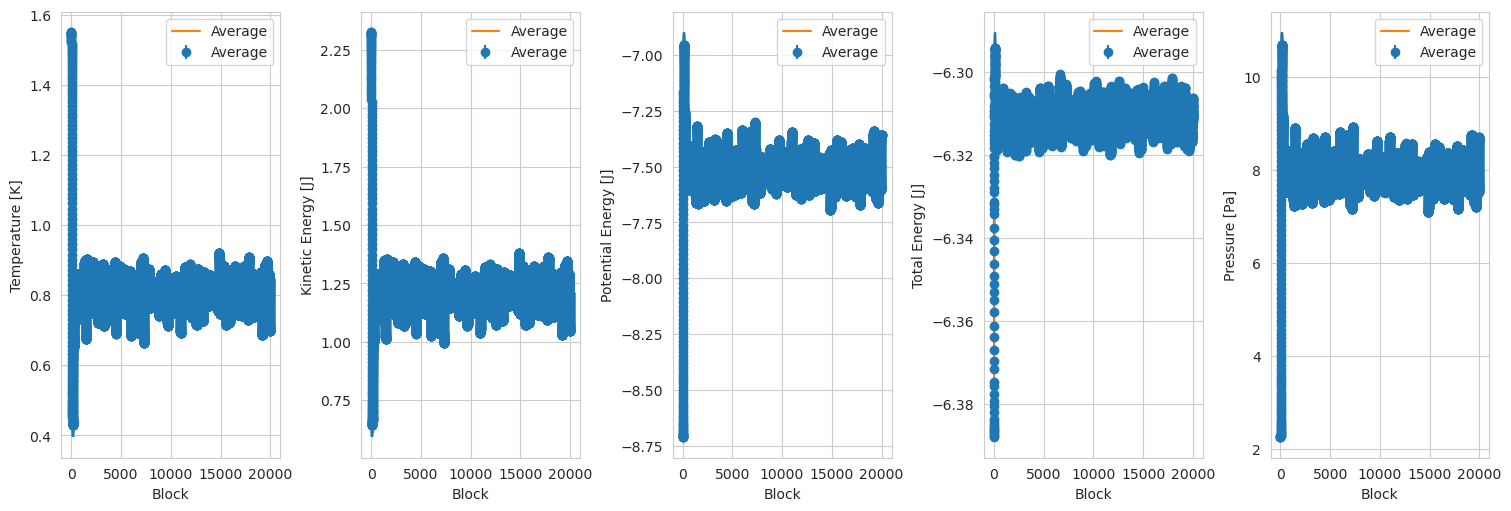

In [27]:
solid_dfs : List[pd.DataFrame] = load_resulting_data(solid_res_dir)
solid_fig, solid_axs = print_resulting_data(*solid_dfs)

# Liquid Phase Simulation

In [28]:
eq.load_config(eq.Phase.LIQUID)
eq.run_program('NSL_SIMULATOR/SOURCE/')
eq.save_result(eq.Phase.LIQUID)

Actually working on phase : LIQUID
Configuration for phase liquid loaded
Properties loaded
/home/pilo/simNumeric/NSL_SIMULATOR/SOURCE
Random number generator initialized

Starting Parsing of input.dat

Ended Parsing Properties

System initialized

Properties initialized

ENDING

Program executed
Copying kinetic_energy.dat to eser_4/equilibration_result/liquid/kinetic_energy.dat
Copying output.dat to eser_4/equilibration_result/liquid/output.dat
Copying potential_energy.dat to eser_4/equilibration_result/liquid/potential_energy.dat
Copying pressure.dat to eser_4/equilibration_result/liquid/pressure.dat
Copying seed.out to eser_4/equilibration_result/liquid/seed.out
Copying temperature.dat to eser_4/equilibration_result/liquid/temperature.dat
Copying total_energy.dat to eser_4/equilibration_result/liquid/total_energy.dat
Results for phase liquid saved


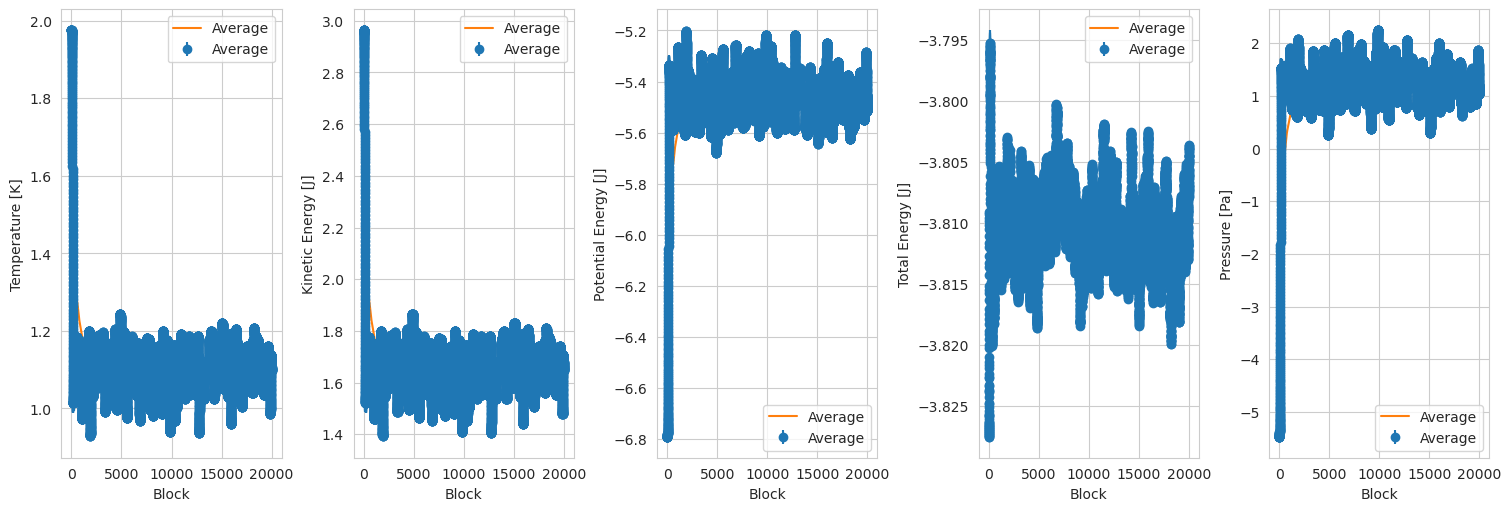

In [31]:
liquid_dfs : List[pd.DataFrame] = load_resulting_data(liquid_res_dir)
liquid_fig, liquid_axs = print_resulting_data(*liquid_dfs)

# Gas phase simulation

In [32]:
eq.load_config(eq.Phase.GAS)
eq.run_program('NSL_SIMULATOR/SOURCE/')
eq.save_result(eq.Phase.GAS)

Actually working on phase : GAS
Configuration for phase gas loaded
Properties loaded
/home/pilo/simNumeric/NSL_SIMULATOR/SOURCE
Random number generator initialized

Starting Parsing of input.dat

Ended Parsing Properties

System initialized

Properties initialized

ENDING

Program executed
Copying kinetic_energy.dat to eser_4/equilibration_result/gas/kinetic_energy.dat
Copying output.dat to eser_4/equilibration_result/gas/output.dat
Copying potential_energy.dat to eser_4/equilibration_result/gas/potential_energy.dat
Copying pressure.dat to eser_4/equilibration_result/gas/pressure.dat
Copying seed.out to eser_4/equilibration_result/gas/seed.out
Copying temperature.dat to eser_4/equilibration_result/gas/temperature.dat
Copying total_energy.dat to eser_4/equilibration_result/gas/total_energy.dat
Results for phase gas saved


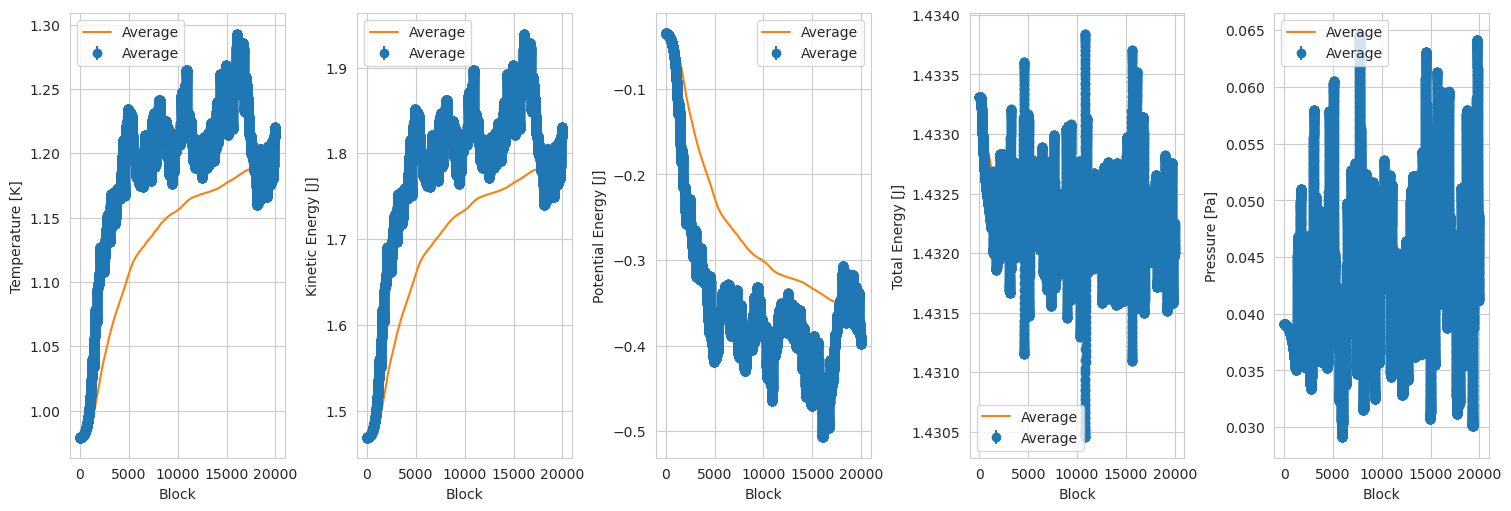

In [33]:
gas_dfs : List[pd.DataFrame] = load_resulting_data(gas_res_dir)
gas_fig, gas_axs = print_resulting_data(*gas_dfs)

- La Temperatura per i solidi di partenza è 1.55
- La Temperatura per i liquidi di partenza è 1.977 
- La Temperatura per i gas di parteza è 0.979

### <span style="color:green"> Equilibration is needed!</span>

By monitoring the temperature, $T$, during the first time steps of the simulation, you will observe that at the beginning, starting from a perfect crystalline configuration, $T$ will not conserve its value. Can you understand and explain this behaviour?

Explore and find the starting value of $T$ needed to stabilize, after a certain number of time steps (equilibration time), the average value of $T$ on the desired $T^\star$. <span style="color:red">Perform your solid/liquid phase MD simulations by re-starting them after such equilibration time.</span>

In gas the temperature raises rather than diminishing